In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import mmcv
from mmseg.apis import init_model, inference_model, show_result_pyplot
from mmseg.utils import register_all_modules
register_all_modules()

In [2]:
import os

import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

#### 查看单张图像及其语义分割标注

In [10]:
# 指定单张图像路径
img_path = 'data/Watermelon87_Semantic_Seg_Mask/img_dir/train/R (2).jpeg'
mask_path = 'data/Watermelon87_Semantic_Seg_Mask/ann_dir/train/R (2).png'

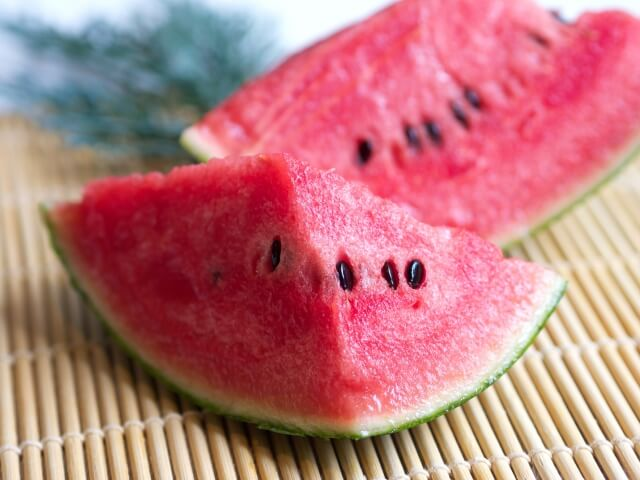

In [11]:
Image.open(img_path)

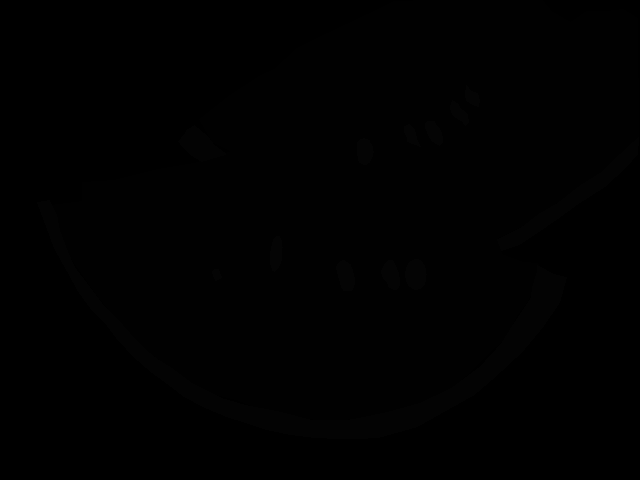

In [12]:
Image.open(mask_path)

In [13]:
img = cv2.imread(img_path)
mask = cv2.imread(mask_path)

In [14]:
img.shape

(480, 640, 3)

In [15]:
mask.shape

(480, 640, 3)

In [16]:
# mask 语义分割标注，与原图大小相同
np.unique(mask)

array([0, 1, 3, 4], dtype=uint8)

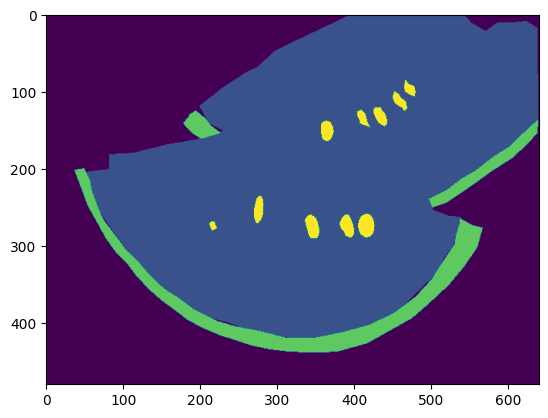

In [17]:
# 可视化语义分割标注
plt.imshow(mask[:,:,0])
plt.show()

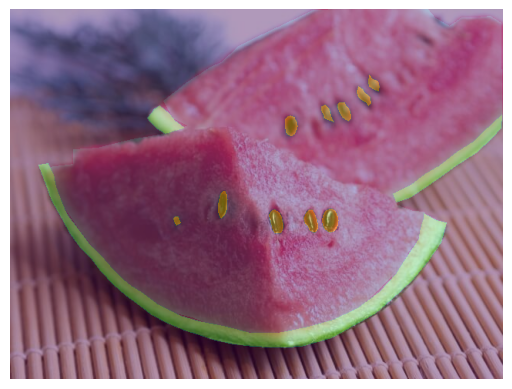

In [18]:
#叠加在原图进行显示
plt.imshow(img[:,:,::-1])
plt.imshow(mask[:,:,0], alpha=0.4) # alpha 高亮区域透明度，越小越接近原图
plt.axis('off')
plt.show()

#### 批量可视化图像和标注

In [19]:
# 指定图像和标注路径
PATH_IMAGE = 'data/Watermelon87_Semantic_Seg_Mask/img_dir/train'
PATH_MASKS = 'data/Watermelon87_Semantic_Seg_Mask/ann_dir/train'

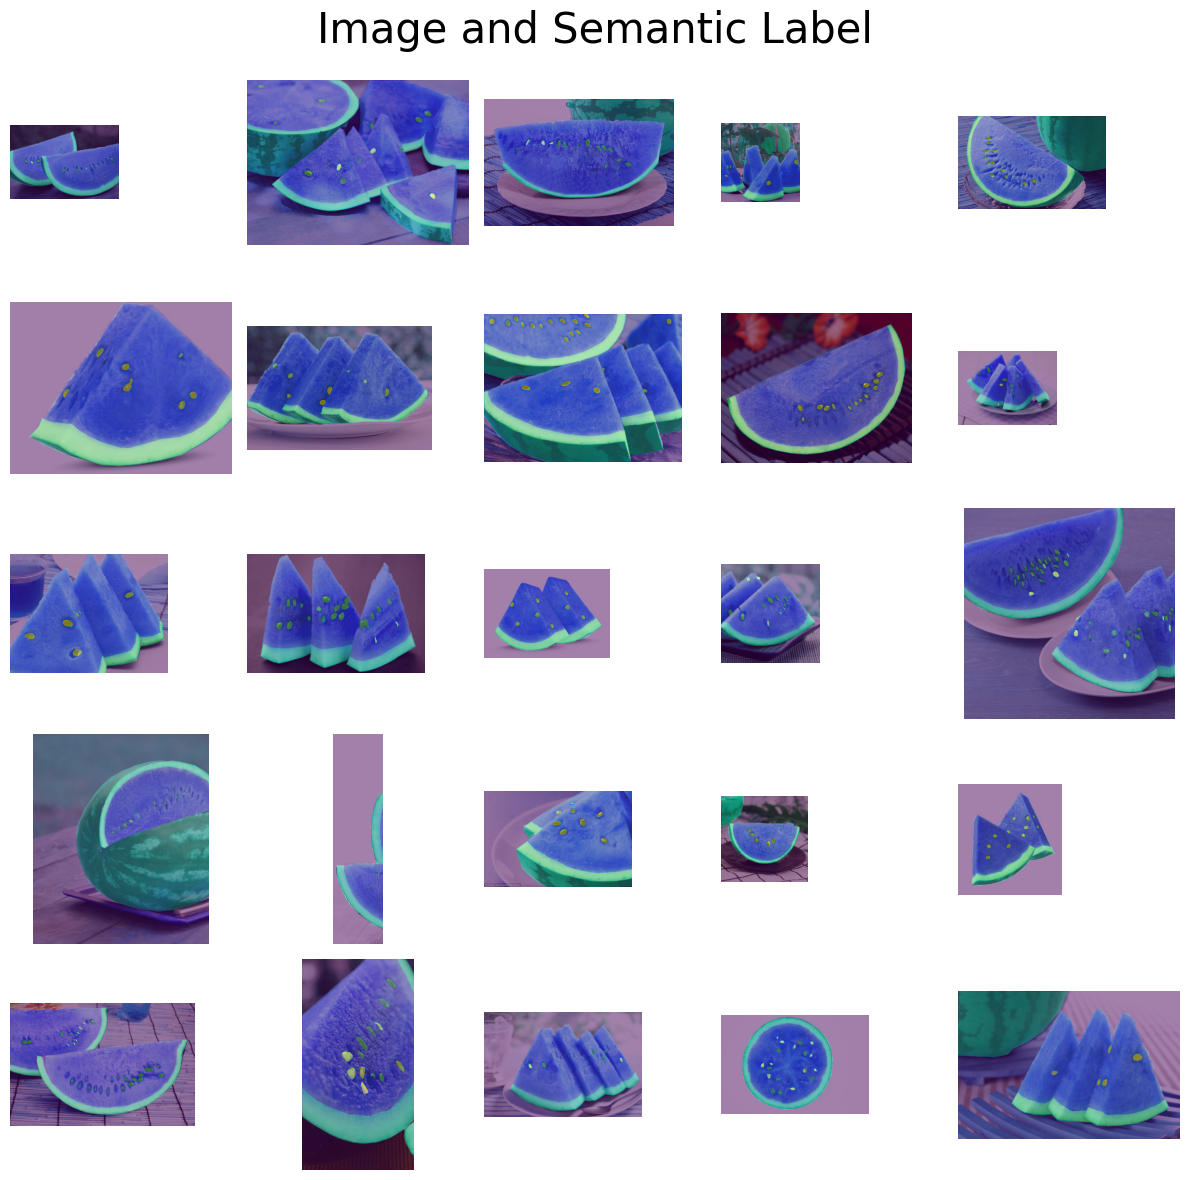

In [20]:
# n行n列可视化
n = 5

# 标注区域透明度
opacity = 0.5

fig, axes = plt.subplots(nrows=n, ncols=n, sharex=True, figsize=(12,12))

for i, file_name in enumerate(os.listdir(PATH_IMAGE)[:n**2]):
    
    # 载入图像和标注
    img_path = os.path.join(PATH_IMAGE, file_name)
    mask_path = os.path.join(PATH_MASKS, file_name.split('.')[0]+'.png')
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    
    # 可视化
    axes[i//n, i%n].imshow(img)
    axes[i//n, i%n].imshow(mask[:,:,0], alpha=opacity)
    axes[i//n, i%n].axis('off') # 关闭坐标轴显示
fig.suptitle('Image and Semantic Label', fontsize=30)
plt.tight_layout()
plt.show()

#### 将改过的_init_.py文件中的添加的WatermelonDataset类通过编译加到库中

In [50]:
!python setup.py install 
 


running install
running bdist_egg
running egg_info
writing mmsegmentation.egg-info\PKG-INFO
writing dependency_links to mmsegmentation.egg-info\dependency_links.txt
writing requirements to mmsegmentation.egg-info\requires.txt
writing top-level names to mmsegmentation.egg-info\top_level.txt
reading manifest file 'mmsegmentation.egg-info\SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'mmsegmentation.egg-info\SOURCES.txt'
installing library code to build\bdist.win-amd64\egg
running install_lib
running build_py
copying mmseg\.mim\model-index.yml -> build\lib\mmseg\.mim
copying mmseg\.mim\configs\_base_\datasets\WatermelonDataset_pipeline.py -> build\lib\mmseg\.mim\configs\_base_\datasets
creating build\bdist.win-amd64\egg
creating build\bdist.win-amd64\egg\mmseg
creating build\bdist.win-amd64\egg\mmseg\.mim
creating build\bdist.win-amd64\egg\mmseg\.mim\configs
creating build\bdist.win-amd64\egg\mmseg\.mim\configs\ann
copying build\l

D:\Miniconda\Minicondaanzhuang\envs\pytorchgpu\lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
D:\Miniconda\Minicondaanzhuang\envs\pytorchgpu\lib\site-packages\setuptools\command\easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(


In [51]:
!pip install -v -e . 

Using pip 23.0.1 from D:\Miniconda\Minicondaanzhuang\envs\pytorchgpu\lib\site-packages\pip (python 3.9)
Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple
Obtaining file:///C:/Users/HKZ/mmsegmentation
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: mmsegmentation
    Found existing installation: mmsegmentation 1.0.0
    Uninstalling mmsegmentation-1.0.0:
      Removing file or directory d:\miniconda\minicondaanzhuang\envs\pytorchgpu\lib\site-packages\mmsegmentation-1.0.0-py3.9.egg
      Removing pth entries from d:\miniconda\minicondaanzhuang\envs\pytorchgpu\lib\site-packages\easy-install.pth:
      Removing entry: ./mmsegmentation-1.0.0-py3.9.egg
      Successfully uninstalled mmsegmentation-1.0.0
  Running setup.py develop for mmsegmentation


  Running command python setup.py egg_info
  running egg_info
  creating C:\Users\HKZ\AppData\Local\Temp\pip-pip-egg-info-4xlabbgb\mmsegmentation.egg-info
  writing C:\Users\HKZ\AppData\Local\Temp\pip-pip-egg-info-4xlabbgb\mmsegmentation.egg-info\PKG-INFO
  writing dependency_links to C:\Users\HKZ\AppData\Local\Temp\pip-pip-egg-info-4xlabbgb\mmsegmentation.egg-info\dependency_links.txt
  writing requirements to C:\Users\HKZ\AppData\Local\Temp\pip-pip-egg-info-4xlabbgb\mmsegmentation.egg-info\requires.txt
  writing top-level names to C:\Users\HKZ\AppData\Local\Temp\pip-pip-egg-info-4xlabbgb\mmsegmentation.egg-info\top_level.txt
  writing manifest file 'C:\Users\HKZ\AppData\Local\Temp\pip-pip-egg-info-4xlabbgb\mmsegmentation.egg-info\SOURCES.txt'
  reading manifest file 'C:\Users\HKZ\AppData\Local\Temp\pip-pip-egg-info-4xlabbgb\mmsegmentation.egg-info\SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  adding license file 'LICENSE'
  writing manifest file 'C:\Users\HKZ\AppData\Local

#### 修改config配置文件

In [1]:
from mmengine import Config
cfg = Config.fromfile('./configs/pspnet/pspnet_r50-d8_4xb2-40k_watermelon.py')

In [2]:
cfg.norm_cfg = dict(type='BN', requires_grad=True) # 只使用GPU时，BN取代SyncBN
cfg.crop_size = (256, 256)
cfg.model.data_preprocessor.size = cfg.crop_size
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head

# 模型 decode/auxiliary 输出头，指定为类别个数
cfg.model.decode_head.num_classes = 6
cfg.model.auxiliary_head.num_classes = 6

cfg.train_dataloader.batch_size = 8

cfg.test_dataloader = cfg.val_dataloader

# 结果保存目录
cfg.work_dir = './work_dirs/WatermelonDataset'

# 训练迭代次数
cfg.train_cfg.max_iters = 3000
# 评估模型间隔
cfg.train_cfg.val_interval = 400
# 日志记录间隔
cfg.default_hooks.logger.interval = 100
# 模型权重保存间隔
cfg.default_hooks.checkpoint.interval = 1500

# 随机数种子
cfg['randomness'] = dict(seed=0)

In [3]:
cfg.dump('pspnet-WatermelonDataset_20230614.py')

In [4]:
cfg = Config.fromfile('pspnet-WatermelonDataset_20230614.py')

#### 准备训练

In [5]:
from mmengine.runner import Runner
from mmseg.utils import register_all_modules

# register all modules in mmseg into the registries
# do not init the default scope here because it will be init in the runner
register_all_modules(init_default_scope=False)
runner = Runner.from_cfg(cfg)

06/14 12:23:20 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: win32
    Python: 3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: NVIDIA GeForce RTX 3060
    CUDA_HOME: None
    MSVC: n/a, reason: fileno
    PyTorch: 2.0.1+cu117
    PyTorch compiling details: PyTorch built with:
  - C++ Version: 199711
  - MSVC 193431937
  - Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 2019
  - LAPACK is enabled (usually provided by MKL)
  - CPU capability usage: AVX2
  - CUDA Runtime 11.7
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,code=sm_61;-gencode;arch=compute_70,code=sm_70;-gencod

C:\Users\HKZ\mmsegmentation\mmseg\models\backbones\resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
C:\Users\HKZ\mmsegmentation\mmseg\models\builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
C:\Users\HKZ\mmsegmentation\mmseg\models\losses\cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


06/14 12:23:21 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/14 12:23:21 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

C:\Users\HKZ\mmsegmentation\mmseg\engine\hooks\visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


#### 开始训练

In [7]:
runner.train()

06/14 12:35:19 - mmengine - WARNING - init_weights of ResLayer has been called more than once.
06/14 12:35:19 - mmengine - INFO - load model from: open-mmlab://resnet50_v1c
06/14 12:35:19 - mmengine - INFO - Loads checkpoint by openmmlab backend from path: open-mmlab://resnet50_v1c
06/14 12:35:19 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

06/14 12:35:19 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
06/14 12:35:19 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.
06/14 12:35:19 - mmengine - INFO - Checkpoints will be saved to C:\Users\HKZ\mmsegmentation\work_dirs\WatermelonDataset.
06/14 12:35:32 - mmengine - INFO - Exp name: pspnet-WatermelonDataset_20230614_20230614_122313
06/14 12:35:32 - mmengine - INFO - Iter(train)

06/14 12:45:56 - mmengine - INFO - Iter(train) [1900/3000]  lr: 9.5760e-03  eta: 0:05:52  time: 0.3146  data_time: 0.0022  memory: 3596  loss: 0.0383  decode.loss_ce: 0.0271  decode.acc_seg: 86.8805  aux.loss_ce: 0.0112  aux.acc_seg: 87.7533
06/14 12:46:27 - mmengine - INFO - Exp name: pspnet-WatermelonDataset_20230614_20230614_122313
06/14 12:46:27 - mmengine - INFO - Iter(train) [2000/3000]  lr: 9.5536e-03  eta: 0:05:20  time: 0.3139  data_time: 0.0022  memory: 3596  loss: 0.0430  decode.loss_ce: 0.0296  decode.acc_seg: 79.1595  aux.loss_ce: 0.0134  aux.acc_seg: 75.9674
06/14 12:46:29 - mmengine - INFO - per class results:
06/14 12:46:29 - mmengine - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
|    red     | 62.65 | 91.86 |
|   green    | 71.08 | 80.23 |
|   white    |  6.14 |  6.14 |
| seed-black | 47.69 | 53.97 |
| seed-white | 66.98 | 76.63 |
| Unlabeled  |  0.0  |  0.0  |
+------------+-------+-------+
06/14 12:46:29 - mmen

EncoderDecoder(
  (data_preprocessor): SegDataPreProcessor()
  (backbone): ResNetV1c(
    (stem): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-0

### 可视化训练日志

In [13]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体

#### 载入训练日志

In [29]:
log_path = 'work_dirs/WatermelonDataset/20230614_122313/vis_data/scalars.json'

In [30]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [31]:
len(json_list)

38

In [32]:
eval(json_list[4])

{'lr': 0.009911076035273796,
 'data_time': 0.0018902063369750977,
 'loss': 0.05100258737802506,
 'decode.loss_ce': 0.03591420669108629,
 'decode.acc_seg': 77.62451171875,
 'aux.loss_ce': 0.015088381245732307,
 'aux.acc_seg': 75.6500244140625,
 'time': 0.311572790145874,
 'memory': 3596,
 'step': 400}

In [33]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in json_list[:-1]:
    if 'aAcc' in each:
        df_test = df_test.append(eval(each), ignore_index=True)
    else:
        df_train = df_train.append(eval(each), ignore_index=True)

In [34]:
df_train

,aux.acc_seg,aux.loss_ce,data_time,decode.acc_seg,decode.loss_ce,loss,lr,memory,step,time
0,20.321655,0.045845,0.002328,56.845093,0.105728,0.151573,0.010000,6131.0,3.0,4.240438
1,79.067993,0.023114,0.001885,86.160278,0.049385,0.072499,0.009978,3596.0,100.0,0.310963
2,67.990112,0.017419,0.001880,57.592773,0.040293,0.057712,0.009956,3596.0,200.0,0.309772
3,71.148682,0.016596,0.001993,76.803589,0.038400,0.054996,0.009933,3596.0,300.0,0.311567
4,75.650024,0.015088,0.001890,77.624512,0.035914,0.051003,0.009911,3596.0,400.0,0.311573
5,70.458984,0.014949,0.001900,68.936157,0.038235,0.053185,0.009889,8859.0,500.0,0.313258
6,74.533081,0.015366,0.001989,82.031250,0.036312,0.051678,0.009866,3596.0,600.0,0.313370
7,78.872681,0.015153,0.001796,79.827881,0.033552,0.048705,0.009844,3596.0,700.0,0.313262
8,70.632935,0.015817,0.002092,81.246948,0.037803,0.053620,0.009822,3596.0,800.0,0.313664
9,74.078369,0.011670,0.001994,70.318604,0.025770,0.037439,0.009800,3596.0,900.0,0.313650


In [35]:
df_test

,aAcc,data_time,mAcc,mIoU,step,time
0,72.52,0.467580,50.53,41.01,400.0,3.908973
1,75.97,0.013255,53.64,41.76,800.0,0.262451
2,71.84,0.013540,42.51,35.45,1200.0,0.262013
3,61.47,0.013107,32.28,24.43,1600.0,0.260874
4,73.29,0.012674,51.47,42.42,2000.0,0.261164
5,75.26,0.012548,46.08,38.17,2400.0,0.261446
6,76.37,0.012680,50.82,43.12,2800.0,0.261163


In [36]:
df_train.to_csv('训练日志-训练集.csv', index=False)
df_test.to_csv('训练日志-测试集.csv', index=False)

#### 可视化辅助函数

In [37]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [38]:
metrics = ['loss', 'decode.loss_ce', 'aux.loss_ce']

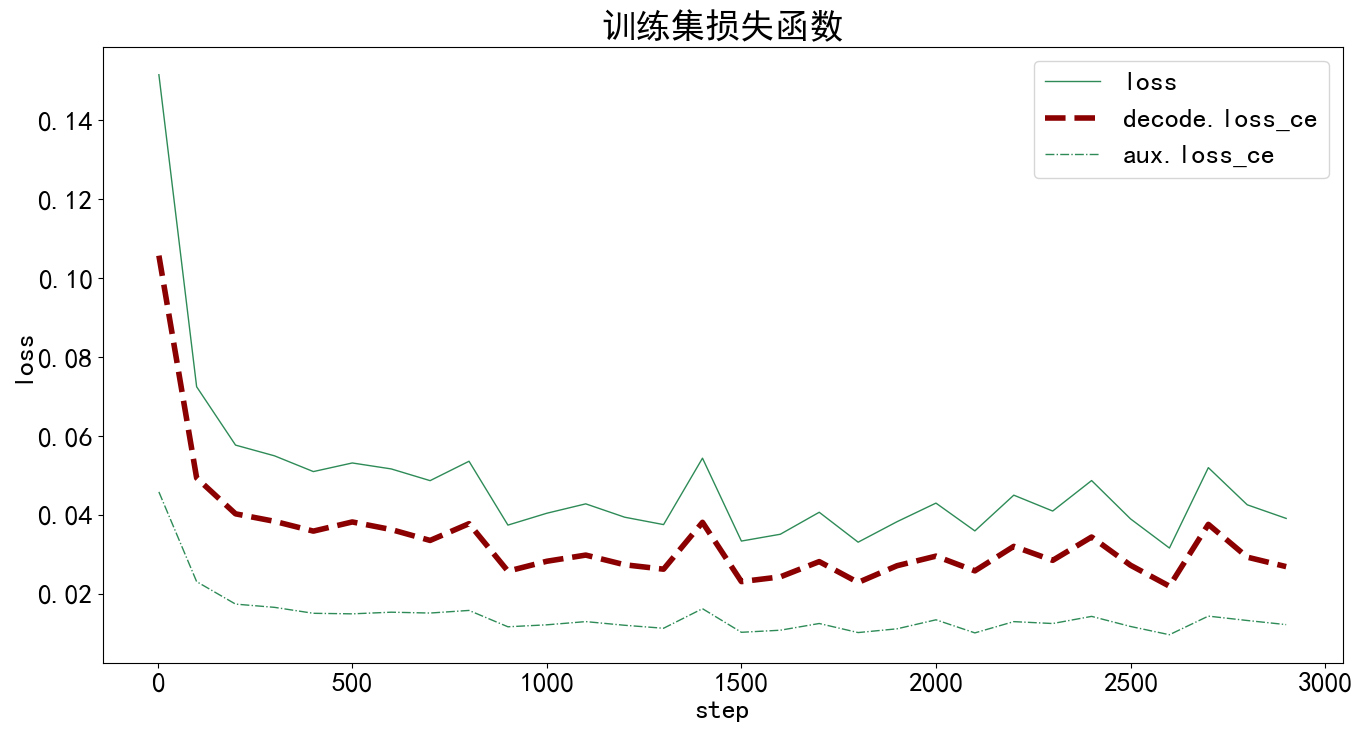

In [39]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

In [40]:
df_train.columns

Index(['aux.acc_seg', 'aux.loss_ce', 'data_time', 'decode.acc_seg',
       'decode.loss_ce', 'loss', 'lr', 'memory', 'step', 'time'],
      dtype='object')

In [41]:
metrics = ['decode.acc_seg', 'aux.acc_seg']

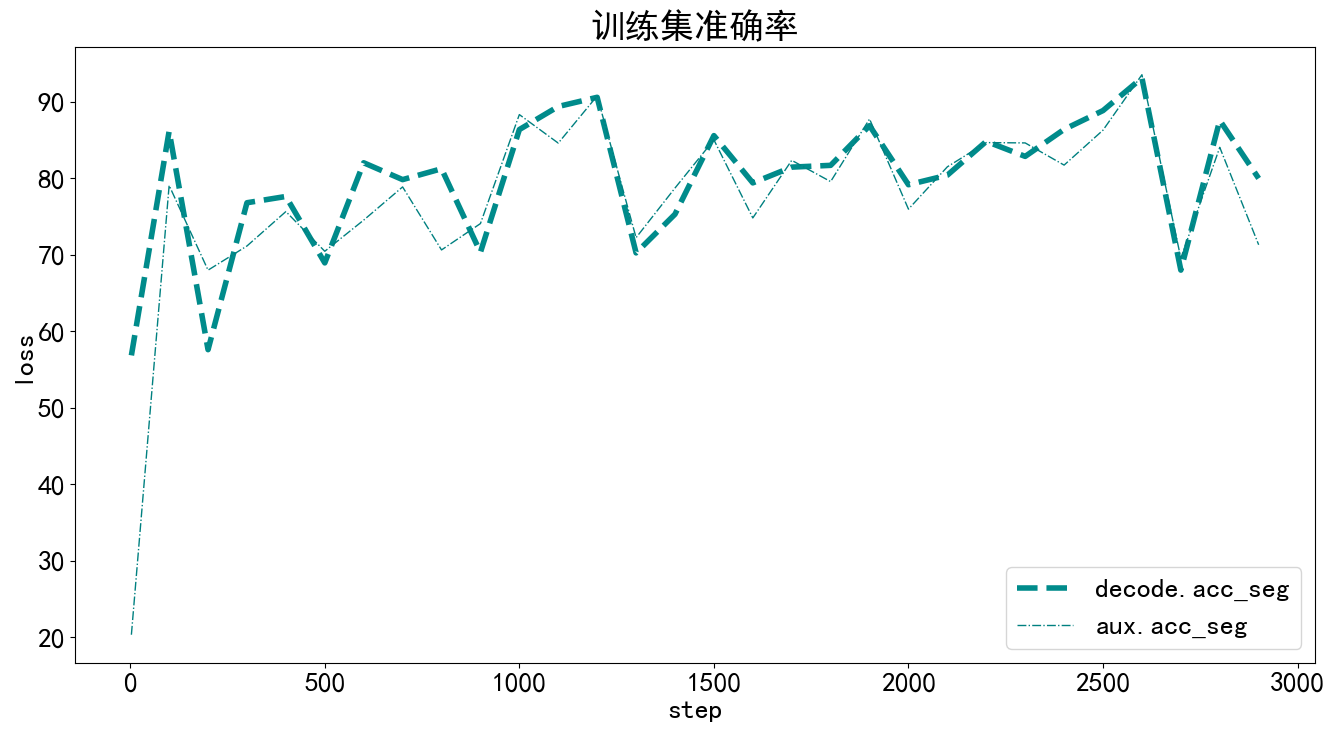

In [42]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

In [43]:
df_test.columns

Index(['aAcc', 'data_time', 'mAcc', 'mIoU', 'step', 'time'], dtype='object')

In [44]:
metrics = ['aAcc', 'mIoU', 'mAcc']

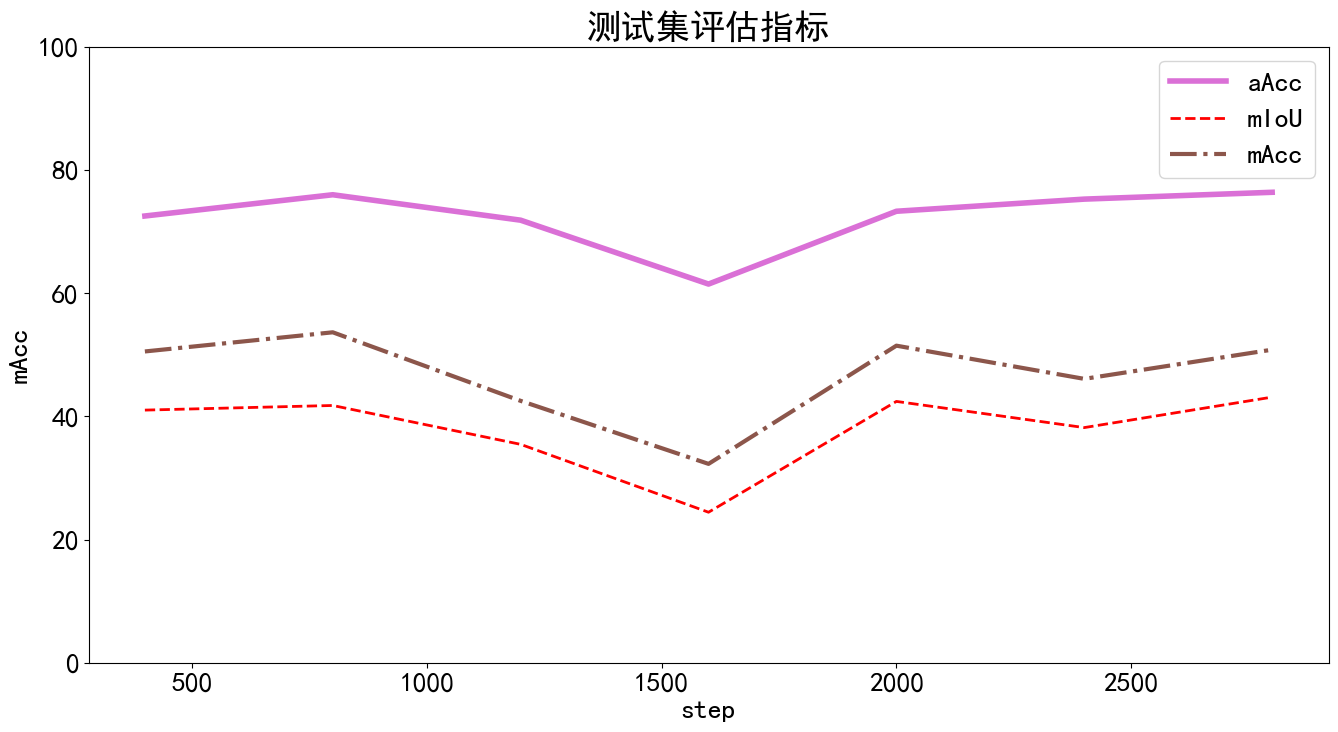

In [52]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

### 用训练得到的模型预测

In [53]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mmseg.apis import init_model, inference_model, show_result_pyplot
import mmcv
import cv2

In [54]:
# 载入 config 配置文件
from mmengine import Config
cfg = Config.fromfile('pspnet-WatermelonDataset_20230614.py')

In [55]:
from mmengine.runner import Runner
from mmseg.utils import register_all_modules

# register all modules in mmseg into the registries
# do not init the default scope here because it will be init in the runner

register_all_modules(init_default_scope=False)
runner = Runner.from_cfg(cfg)

06/14 16:03:37 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: win32
    Python: 3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: NVIDIA GeForce RTX 3060
    CUDA_HOME: None
    MSVC: n/a, reason: fileno
    PyTorch: 2.0.1+cu117
    PyTorch compiling details: PyTorch built with:
  - C++ Version: 199711
  - MSVC 193431937
  - Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 2019
  - LAPACK is enabled (usually provided by MKL)
  - CPU capability usage: AVX2
  - CUDA Runtime 11.7
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,code=sm_61;-gencode;arch=compute_70,code=sm_70;-gencod

D:\Miniconda\Minicondaanzhuang\envs\pytorchgpu\lib\site-packages\mmengine\utils\manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
C:\Users\HKZ\mmsegmentation\mmseg\models\backbones\resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
C:\Users\HKZ\mmsegmentation\mmseg\models\builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
C:\Users\HKZ\mmsegmentation\mmseg\models\losses\cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch off

06/14 16:03:38 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/14 16:03:38 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

C:\Users\HKZ\mmsegmentation\mmseg\engine\hooks\visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [56]:
checkpoint_path = 'work_dirs/WatermelonDataset/iter_3000.pth'
model = init_model(cfg, checkpoint_path, 'cuda:0')

Loads checkpoint by local backend from path: work_dirs/WatermelonDataset/iter_3000.pth


#### 载入测试集图像，或新图像

In [57]:
#使用新图像
img = mmcv.imread('data/predict/1.jpg')

#### 语义分割预测

In [58]:
result = inference_model(model, img)

In [59]:
result.keys()

['seg_logits', 'pred_sem_seg']

In [60]:
pred_mask = result.pred_sem_seg.data[0].cpu().numpy()

In [61]:
pred_mask.shape

(878, 1322)

In [62]:
np.unique(pred_mask)

array([0, 1, 2, 3, 4], dtype=int64)

#### 可视化语义分割预测结果

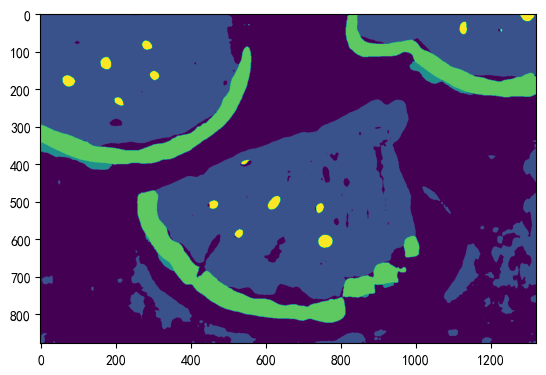

In [63]:
plt.imshow(pred_mask)
plt.show()

06/14 16:08:37 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


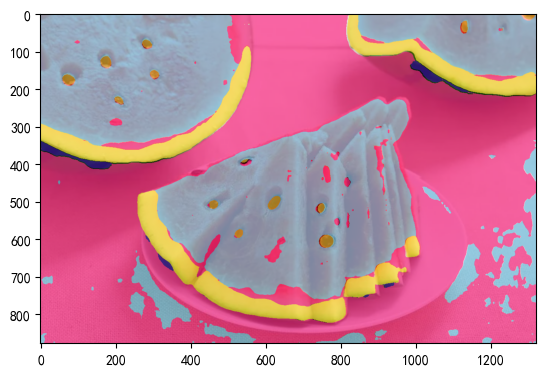

In [64]:
# 可视化预测结果
visualization = show_result_pyplot(model, img, result, opacity=0.7, out_file='pred.jpg')
plt.imshow(mmcv.bgr2rgb(visualization))
plt.show()

In [65]:
#使用数据集里的图片
img2 = mmcv.imread('data/Watermelon87_Semantic_Seg_Mask/img_dir/val/OIP (11).jpeg')

In [66]:
result2 = inference_model(model, img2)

In [68]:
pred_mask2 = result2.pred_sem_seg.data[0].cpu().numpy()

In [69]:
pred_mask2.shape

(1917, 2000)

In [70]:
np.unique(pred_mask2)

array([0, 1, 2, 3, 4], dtype=int64)

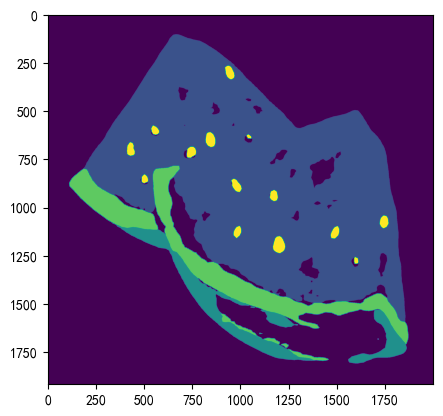

In [71]:
plt.imshow(pred_mask2)
plt.show()

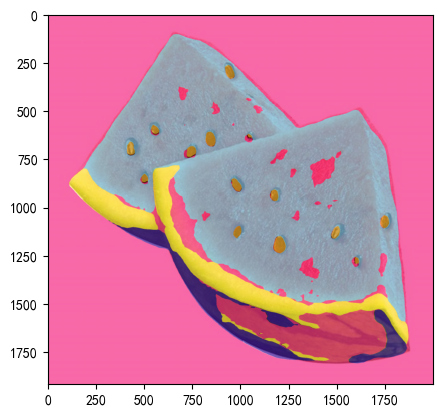

In [72]:
# 可视化预测结果
visualization = show_result_pyplot(model, img2, result2, opacity=0.7, out_file='pred.jpg')
plt.imshow(mmcv.bgr2rgb(visualization))
plt.show()

#### 获取测试集标注

In [73]:
label = mmcv.imread('data/Watermelon87_Semantic_Seg_Mask/ann_dir/val/OIP (11).png')

In [74]:
label.shape

(1917, 2000, 3)

In [75]:
label_mask = label[:,:,0]

In [76]:
label_mask.shape

(1917, 2000)

In [77]:
np.unique(label_mask)

array([0, 1, 2, 3, 4], dtype=uint8)

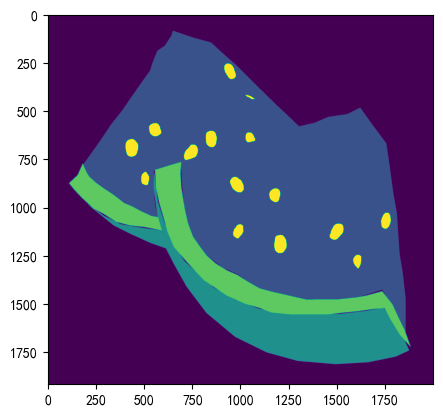

In [78]:
plt.imshow(label_mask)
plt.show()

#### 对比测试集标注和语义分割预测结果

In [79]:
# 测试集标注
label_mask.shape

(1917, 2000)

In [88]:
# 语义分割预测结果
pred_mask2.shape

(1917, 2000)

In [81]:
# 真实为前景，预测为前景
TP = (label_mask == 1) & (pred_mask2==1)

In [82]:
# 真实为背景，预测为背景
TN = (label_mask == 0) & (pred_mask2==0)

In [83]:
# 真实为前景，预测为背景
FN = (label_mask == 1) & (pred_mask2==0)

In [89]:
# 真实为背景，预测为前景
FP = (label_mask == 0) & (pred_mask2==1)

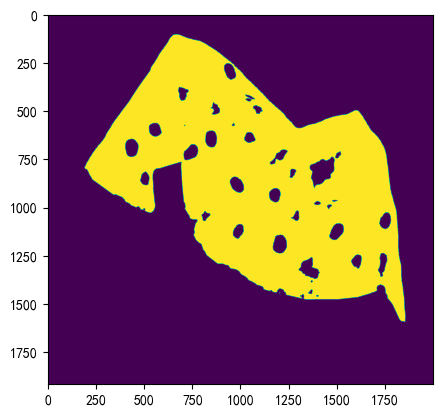

In [90]:
plt.imshow(TP)
plt.show()

In [91]:
confusion_map = TP * 255 + FP * 150 + FN * 80 + TN * 30

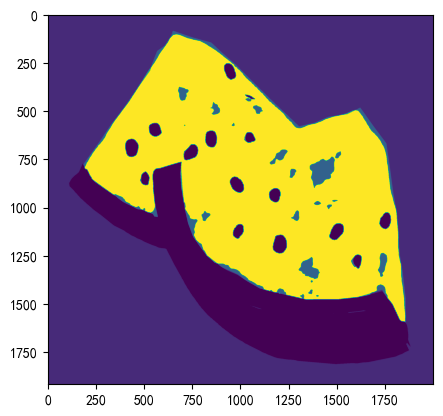

In [92]:
plt.imshow(confusion_map)
plt.show()

#### 混淆矩阵

In [93]:
from sklearn.metrics import confusion_matrix

In [94]:
confusion_matrix_model = confusion_matrix(label_mask.flatten(), pred_mask.flatten())

In [95]:
confusion_matrix_model

array([[1989828,    1919,    5838,    5545,       0],
       [  71328, 1212776,       0,    2354,     784],
       [ 148613,       0,   98080,   26773,       0],
       [  35823,   12209,     199,  171191,       0],
       [   2433,   20048,       0,       0,   28259]], dtype=int64)

In [96]:
import itertools
def cnf_matrix_plotter(cm, classes, cmap=plt.cm.Blues):
    """
    传入混淆矩阵和标签名称列表，绘制混淆矩阵
    """
    plt.figure(figsize=(10, 10))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    # plt.colorbar() # 色条
    tick_marks = np.arange(len(classes))
    
    plt.title('Confusion Matrix', fontsize=30)
    plt.xlabel('Pred', fontsize=25, c='r')
    plt.ylabel('True', fontsize=25, c='r')
    plt.tick_params(labelsize=16) # 设置类别文字大小
    plt.xticks(tick_marks, classes, rotation=90) # 横轴文字旋转
    plt.yticks(tick_marks, classes)
    
    # 写数字
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 fontsize=12)

    plt.tight_layout()

    plt.savefig('混淆矩阵.pdf', dpi=300) # 保存图像
    plt.show()

In [99]:
classes = ['red', 'green', 'white', 'seed-black', 'seed-white', 'Unlabeled']

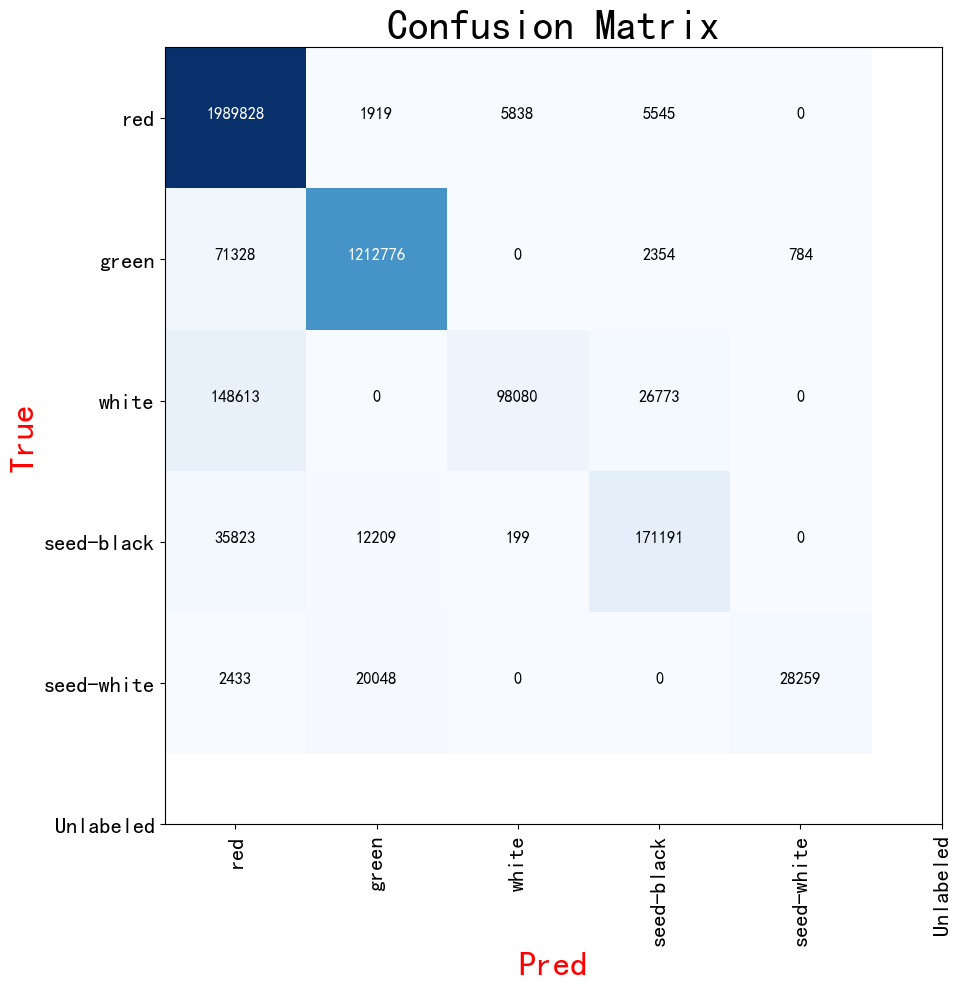

In [100]:
cnf_matrix_plotter(confusion_matrix_model, classes, cmap='Blues')